# Scientific Programming and Dynamical Modelling in Julia
#### Winter Semester 23/24, TUM
---
## Exercise 1: The Logistic Map and its Properties

In [1]:
import Pkg; Pkg.activate("env_ex1.jl")
using Plots, Plots.PlotMeasures

  Activating project at `c:\Users\colin\OneDrive-TUM\Code\Julia\MMDS_Julia\env_ex1.jl`


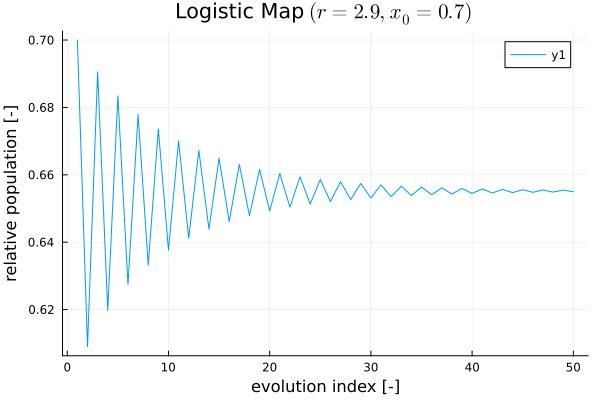

In [2]:
function logistic_map(N, x0, r)
    x = x0
    out = zeros(N)
    for i = 1:N
        out[i] = x
        x = r*x*(1-x)
    end
    out[N] = r*x*(1-x)
    return out
end

N = 50; x0 = .7; r = 2.9
plot(
    1:N,logistic_map(N, x0, r),
    title="Logistic Map \$(r=$r, x_0=$x0)\$",
    xlabel="evolution index [-]",
    ylabel = "relative population [-]"
)

### Varying $x_0$ for fixed $r$

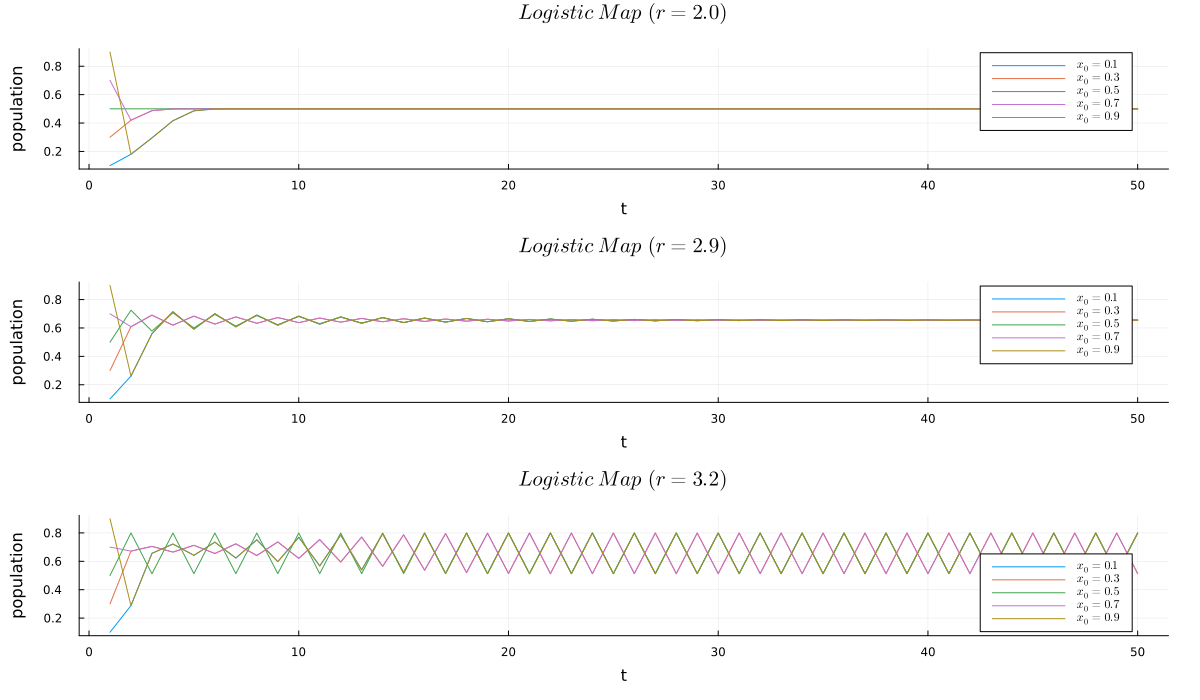

In [24]:
N = 50; x0 = collect(0.1:.2:.9); r = [2.0, 2.9, 3.2]
plt = plot(layout=(length(r), 1), size=(1200, 700), title=reshape(["\$Logistic \\; Map \\;\\; (r=$r_)\$" for r_ in r], (1,length(r))))
for (i, x_) in enumerate(x0)
    for (j, r_) in enumerate(r)
        plot!(1:N, logistic_map(N, x_, r_), label="\$x_0=$x_\$", subplot=j)
    end
end
plt

### Varying $r\in\{2.9, 3.2\}$ for fixed $x_0$

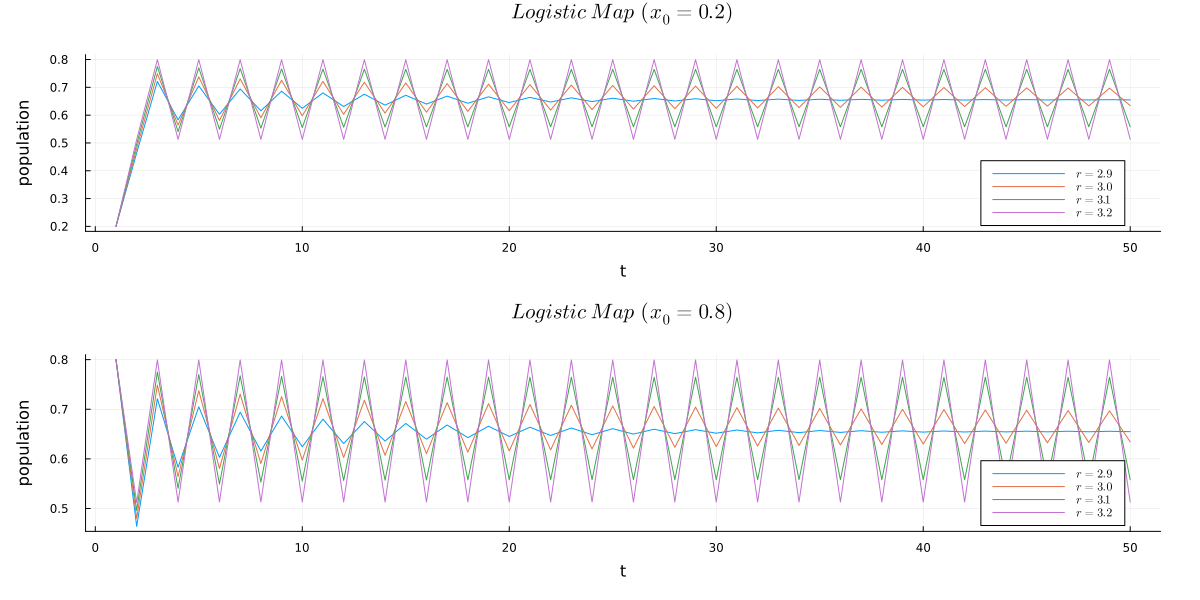

In [18]:
N = 50; x0 = [0.2, 0.8]; r = 2.9:0.1:3.2
plt = plot(layout=(2,1), size=(1200, 600), title=reshape(["\$Logistic \\; Map \\;\\; (x_0=$x_)\$" for x_ in x0], (1,2)), margin=8mm, xlabel="t", ylabel="population")
for (i, x_) in enumerate(x0)
    for (j, r_) in enumerate(r)
        plot!(1:N, logistic_map(N, x_, r_), label="\$r=$r_\$", subplot=i)
    end
end
plt

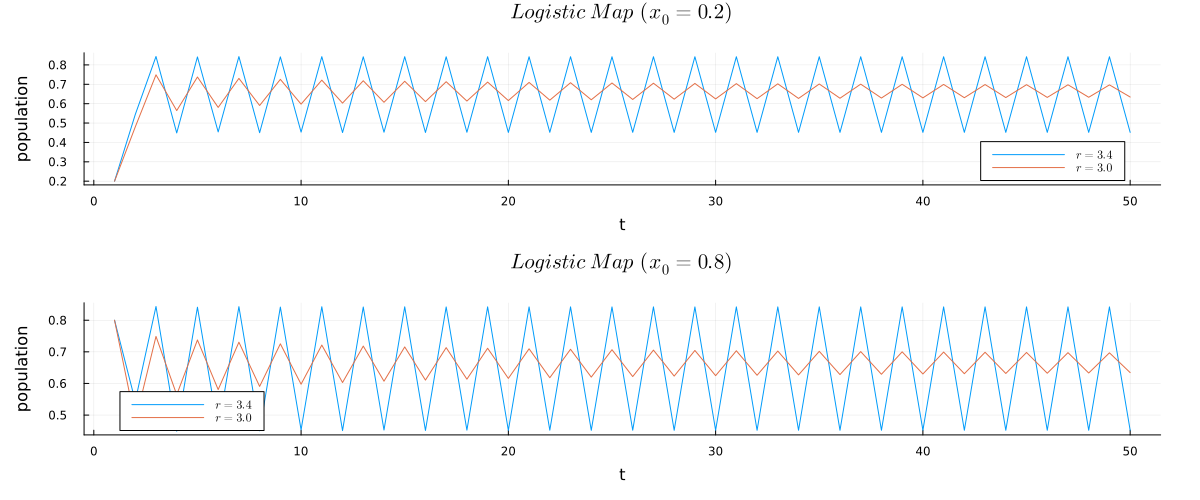

In [15]:
N = 50; x0 = [0.2, 0.8]; r = [3.4, 3.]
plt = plot(layout=(2,1), size=(1200, 500), title=reshape(["\$Logistic \\; Map \\;\\; (x_0=$x_)\$" for x_ in x0], (1,2)), margin=8mm, xlabel="t", ylabel="population")
for (i, x_) in enumerate(x0)
    for (j, r_) in enumerate(r)
        plot!(1:N, logistic_map(N, x_, r_), label="\$r=$r_\$", subplot=i)
    end
end
plt

### Bifurcation Diagram

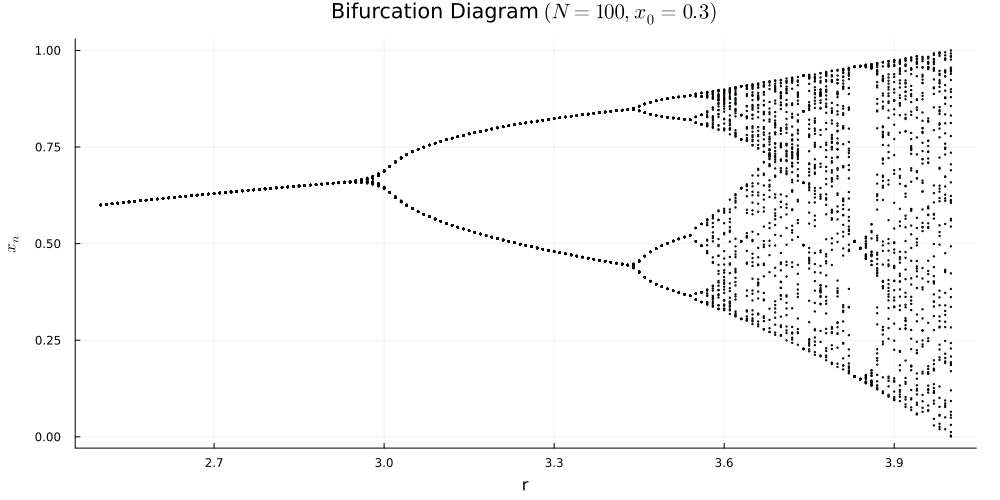

In [6]:
N = 100; N_pick = 50; x0 = 0.3; r = 2.5:0.01:4
plt = scatter(title="Bifurcation Diagram \$(N=$N, x_0=$x0)\$", xlabel="r", ylabel="\$x_n\$", size=(1000, 500), margin=4mm)
for r_ in r
    all_steps = logistic_map(N, x0, r_)
    last_steps = all_steps[end-N_pick:end]
    scatter!(repeat([r_], length(last_steps)), last_steps, legend=false, markersize=0.8)
end
plt